# Descriptives 
COVID-19 and Census Data 
___

<b> Table of Contents: </b>
<br> [0. Loading Modules and Dataset](#0)
<br> [1. Dataset Size](#1)
<br> [2. Dataset Datatypes](#2)
<br> [3. Dataset Statistics](#3)
<br> [4. Dataset Zero's and Nan's](#4)
<br> [5. Visualize Dataset](#5)
<br> [6. Dataset Skewness](#6)
<br> [7. Correlation Analysis](#7)
<br> [8. Automated EDA Python packages](#8)

This data set consists of COVID-19 and Census data in one csv file. Three csv files were combinded to create this final working version. 

The first data source utlized in the final combined csv file is COVID-19 data tracking for each county in the entire US. The csv file has data for COVID-19 cases and deaths on every single day since Janurary 22, 2020 through June 15, 2020. This project utlizes this data source because of the relability of its' county level data. The Census Economic and Income data is made up of county level data and in order to combine the two datasets there needed to be consistency in the formats. 

Data source: USAFACTS https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/
The data source consists of:
- COVID-19 Confirmed Cases per day
- COVID-19 Deathsper day


Data date range: 
- Janurary 22, 2020 - June 15, 2020

The second data source utilized is Census data for every county in the US. ADD HERE

Quick Notes on Data Cleaning:
- Calculated total cases and deaths per month
- Changed state abbreviations to full name to match the Census data
- Fill in state name for any counties that were left blank 
- Compare the county names and order from this dataset to the Census data 
- Delete counties not present in both datasets
- Add county population counts if listed as 0

___
<a id = "0"> <h2> 0. Loading Modules and Dataset  </h2> </a>

<b> Importing Libraries </b>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as seabornInstance 
from scipy import stats
from scipy.stats import norm
import numpy as np
import csv

<b> Loading the Data </b>

In [2]:
df = pd.read_csv("census_covid_final.csv")
df.head()

,Full Name,Country Name,State,State Abbr,Total Population,Households SNAP,Estimated Individuals SNAP,Total Citizen Educated in US,Citizen Less than High School Education,Citizen High School Graduate,...,Median Age,Male Median Age,Female Median Age,Total Households,Average Household Size,Total Families,Total Confirmed Cases,Total Deaths,Case Rate per 1000,Death Rate 1000
0,"Autauga County, Alabama",Autauga County,Alabama,AL,54571,2802,7509,36757,4521,12363,...,37.0,35.9,37.9,20221,3,14613,400,8,7.330,0.147
1,"Baldwin County, Alabama",Baldwin County,Alabama,AL,182265,6644,16344,143022,13997,39771,...,41.1,40.1,42.2,73180,2,41898,401,9,2.200,0.049
2,"Barbour County, Alabama",Barbour County,Alabama,AL,27457,2468,6096,18434,4960,6549,...,39.0,37.2,41.6,9820,2,6015,263,1,9.579,0.036
3,"Bibb County, Alabama",Bibb County,Alabama,AL,22915,933,2426,15859,2833,6958,...,37.8,36.5,39.5,7953,3,5201,121,1,5.280,0.044
4,"Blount County, Alabama",Blount County,Alabama,AL,57322,2244,5902,39475,7980,12740,...,39.0,38.0,40.0,21578,3,14106,130,1,2.268,0.017


In [3]:
# trim the spaces of the cells from the csv file
df.columns = df.columns.to_series().apply(lambda x: x.strip())

In [4]:
# did not print before trimming column name
# test if prints after trimming -- YES
df['Black Race'].head()

0     232
1    1216
2     114
3      64
4     307
Name: Black Race, dtype: int64

___
<a id = "1"> <h2> 1. Data Size </h2> </a>

<b> Number of rows, number of columns in dataset </b>

In [5]:
print('There are # number of rows in the dataset    :', df.shape[0])
print('There are # number of columns in the dataset :', df.shape[1])

There are # number of rows in the dataset    : 3139
There are # number of columns in the dataset : 41


| **# Rows** | **# Features** |
|----------|--------------|
| 3139     | 41           |

___
<a id = "2"> <h2> 2. Dataset Datatypes </h2> </a>

<b> Features datatypes and non-null </b>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3139 entries, 0 to 3138
Data columns (total 41 columns):
Full Name                                   3139 non-null object
Country Name                                3139 non-null object
State                                       3139 non-null object
State Abbr                                  3139 non-null object
Total Population                            3139 non-null int64
Households SNAP                             3139 non-null int64
Estimated Individuals SNAP                  3139 non-null int64
Total Citizen Educated in US                3139 non-null int64
Citizen Less than High School  Education    3139 non-null int64
Citizen High School  Graduate               3139 non-null int64
Citizen Some College  Education             3139 non-null int64
Citizen College Degree                      3139 non-null int64
Citizen Graduate or Professional Degree     3139 non-null int64
Total Citizen Income                        3139 non-null

## Take-Away
* All features and the target variable have no null values

___
<a id = "3"> <h2> 3. Dataset Statistics </h2> </a>

<b> Descriptive Statistics </b>

In [7]:
df.describe().round(2)

,Total Population,Households SNAP,Estimated Individuals SNAP,Total Citizen Educated in US,Citizen Less than High School Education,Citizen High School Graduate,Citizen Some College Education,Citizen College Degree,Citizen Graduate or Professional Degree,Total Citizen Income,...,Median Age,Male Median Age,Female Median Age,Total Households,Average Household Size,Total Families,Total Confirmed Cases,Total Deaths,Case Rate per 1000,Death Rate 1000
count,3139.00,3139.00,3139.00,3139.00,3139.00,3139.00,3139.00,3139.00,3139.00,3139.00,...,3139.00,3139.00,3139.00,3139.00,3139.0,3139.00,3139.00,3139.00,3139.00,3139.00
mean,98157.55,5022.87,12933.97,68742.50,8725.07,18797.59,19997.75,13145.09,8076.99,82640.21,...,40.35,39.16,41.57,37095.28,2.4,23596.98,686.42,37.03,4.19,0.15
std,312959.37,15772.62,42674.98,220604.94,37843.65,50608.84,60443.97,47721.88,30048.27,265255.57,...,5.04,5.09,5.05,111966.14,0.5,77121.41,3546.71,256.18,7.32,0.31
min,82.00,0.00,0.00,64.00,4.00,20.00,27.00,3.00,0.00,67.00,...,22.40,21.70,21.60,39.00,1.0,0.00,0.00,0.00,0.00,0.00
25%,11116.00,573.00,1396.50,7609.00,1022.50,2758.00,2278.00,783.00,386.50,8889.00,...,37.40,36.10,38.80,4374.00,2.0,2556.00,13.00,0.00,0.81,0.00
50%,25887.00,1480.00,3702.00,17789.00,2535.00,6371.00,5269.00,2016.00,1047.00,21017.00,...,40.30,39.10,41.70,10020.00,2.0,6118.00,57.00,1.00,2.02,0.04
75%,66699.00,3635.00,9149.00,45811.00,5790.50,15222.00,14179.50,6399.00,3616.00,54933.50,...,43.40,42.00,44.80,25818.00,3.0,15446.00,251.50,8.00,4.80,0.16
max,9818605.00,333729.00,994512.00,6801851.00,1485760.00,1408905.00,1782880.00,1384333.00,739973.00,8227851.00,...,62.70,61.50,63.50,3241204.00,4.0,2402208.00,86179.00,6965.00,186.02,3.34


## Take-Away
- The standar devations are very large for most of the dataset
- Relatively smaller for Case Rate per 1000 and Death Rate per 1000 which is good because these are going to be used as the best comparisons between counties. This is because rates account for the variablity in population between counties.

<b> Features grouped by data type </b>

In [8]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['Total Population', 'Households SNAP', 'Estimated Individuals SNAP',
        'Total Citizen Educated in US',
        'Citizen Less than High School  Education',
        'Citizen High School  Graduate', 'Citizen Some College  Education',
        'Citizen College Degree', 'Citizen Graduate or Professional Degree',
        'Total Citizen Income', 'Citizen No Income', 'Citizen Income 1-9999',
        'Citizen Income 10000-14999', 'Citizen Income 15000-24999',
        'Citizen Income 25000-34999', 'Citizen Income 35000-49999',
        'Citizen Income 50000-64999', 'Citizen Income 65000-74999',
        'Citizen Income over 75000', 'One Race Population', 'White Race',
        'Black Race', 'Native American Race', 'Asian Race',
        'Pacific Islander Race', 'Other Race Alone', 'Hispanic or Latino',
        'Total Households', 'Average Household Size', 'Total Families',
        'Total Confirmed Cases', 'Total Deaths'],
       dtype='object'),
 dtype('float64'): Index(

___
<a id = "4"> <h2> 4. Dataset Zero's and Nan's </h2> </a>

<b> Features - Zero's & NaN's </b>

_Create a function that creates a dataframe with Zero's and NaN's_

In [9]:
def function_missing(df):
    # Count NaN's
    list_nan = df.isna().sum()

    # Percentage of missing values for each column (To see the amount of usable data for each column and infer the effect replacing NaN's will have by some metric in part 2)
    list_nan_pct = df.isna().mean().round(4) * 100

    # Calculate the sum of the number of times a zero appears in a feature 
    list_zeros = df.isin([0]).sum()

    # Calculate a % of the number of times a zero appears in a feature
    list_zeros_pct = df.isin([0]).mean().round(4) * 100

    # create a dataframe showing the missing and percentage that is missing
    df_combined = pd.concat([list_nan.rename('# NaNs'), list_zeros.rename('# Zeros'), list_nan_pct.rename('% NaNs'), list_zeros_pct.rename('% Zeros')], axis=1)
    
    return(df_combined)

_Apply function to dataframe_

In [10]:
function_missing(df=df)

,# NaNs,# Zeros,% NaNs,% Zeros
Full Name,0,0,0.0,0.00
Country Name,0,0,0.0,0.00
State,0,0,0.0,0.00
State Abbr,0,0,0.0,0.00
Total Population,0,0,0.0,0.00
Households SNAP,0,3,0.0,0.10
Estimated Individuals SNAP,0,3,0.0,0.10
Total Citizen Educated in US,0,0,0.0,0.00
Citizen Less than High School Education,0,0,0.0,0.00
Citizen High School Graduate,0,0,0.0,0.00


## Take-Away
- May have to account for 0 values in 'Households SNAP' and 'Estimated Individuals SNAP'
- 0s for target variables are good, it means there were either 0 cases of COVID or 0 deaths
- Race values that are 0 might be ok, but need to also consider later 

___
<a id = "5"> <h2> 5. Visualize Dataset </h2> </a>

## 1. Barcharts

<b> Visualize Heat Map of the Dataset </b>

,Total Population,Households SNAP,Estimated Individuals SNAP,Total Citizen Educated in US,Citizen Less than High School Education,Citizen High School Graduate,Citizen Some College Education,Citizen College Degree,Citizen Graduate or Professional Degree,Total Citizen Income,...,Median Age,Male Median Age,Female Median Age,Total Households,Average Household Size,Total Families,Total Confirmed Cases,Total Deaths,Case Rate per 1000,Death Rate 1000
Total Population,1.000000,0.918044,0.927689,0.998909,0.951975,0.981833,0.989473,0.976399,0.940000,0.999427,...,-0.189325,-0.190410,-0.190031,0.995891,0.130014,0.994930,0.799636,0.601321,0.120232,0.222972
Households SNAP,0.918044,1.000000,0.995571,0.916177,0.877230,0.943154,0.903543,0.866878,0.838680,0.916108,...,-0.193395,-0.197061,-0.191398,0.929257,0.102754,0.910229,0.810653,0.688951,0.131714,0.266249
Estimated Individuals SNAP,0.927689,0.995571,1.000000,0.924101,0.904537,0.948490,0.912559,0.868661,0.832508,0.924931,...,-0.196589,-0.199668,-0.194954,0.930923,0.120103,0.925511,0.812047,0.680379,0.130163,0.257329
Total Citizen Educated in US,0.998909,0.916177,0.924101,1.000000,0.947006,0.981423,0.989214,0.981720,0.947026,0.999744,...,-0.180294,-0.181255,-0.181299,0.996770,0.125884,0.991149,0.798248,0.603097,0.119470,0.223542
Citizen Less than High School Education,0.951975,0.877230,0.904537,0.947006,1.000000,0.928333,0.928655,0.897074,0.836890,0.949285,...,-0.157128,-0.157923,-0.157022,0.929470,0.123634,0.954800,0.765931,0.571744,0.105000,0.184015
Citizen High School Graduate,0.981833,0.943154,0.948490,0.981423,0.928333,1.000000,0.977636,0.937588,0.896248,0.981045,...,-0.181495,-0.184438,-0.180886,0.982459,0.132402,0.975229,0.808829,0.629783,0.130100,0.252009
Citizen Some College Education,0.989473,0.903543,0.912559,0.989214,0.928655,0.977636,1.000000,0.959497,0.910930,0.989877,...,-0.188428,-0.189433,-0.189435,0.986378,0.131050,0.987831,0.742405,0.535658,0.100797,0.188148
Citizen College Degree,0.976399,0.866878,0.868661,0.981720,0.897074,0.937588,0.959497,1.000000,0.980285,0.980031,...,-0.172840,-0.172299,-0.175481,0.980380,0.114267,0.961545,0.783253,0.594374,0.118559,0.222480
Citizen Graduate or Professional Degree,0.940000,0.838680,0.832508,0.947026,0.836890,0.896248,0.910930,0.980285,1.000000,0.944267,...,-0.166551,-0.166493,-0.168869,0.951490,0.100403,0.917487,0.796248,0.625487,0.134700,0.253168
Total Citizen Income,0.999427,0.916108,0.924931,0.999744,0.949285,0.981045,0.989877,0.980031,0.944267,1.000000,...,-0.187656,-0.188460,-0.188646,0.996305,0.127259,0.992967,0.795591,0.598405,0.119007,0.221165


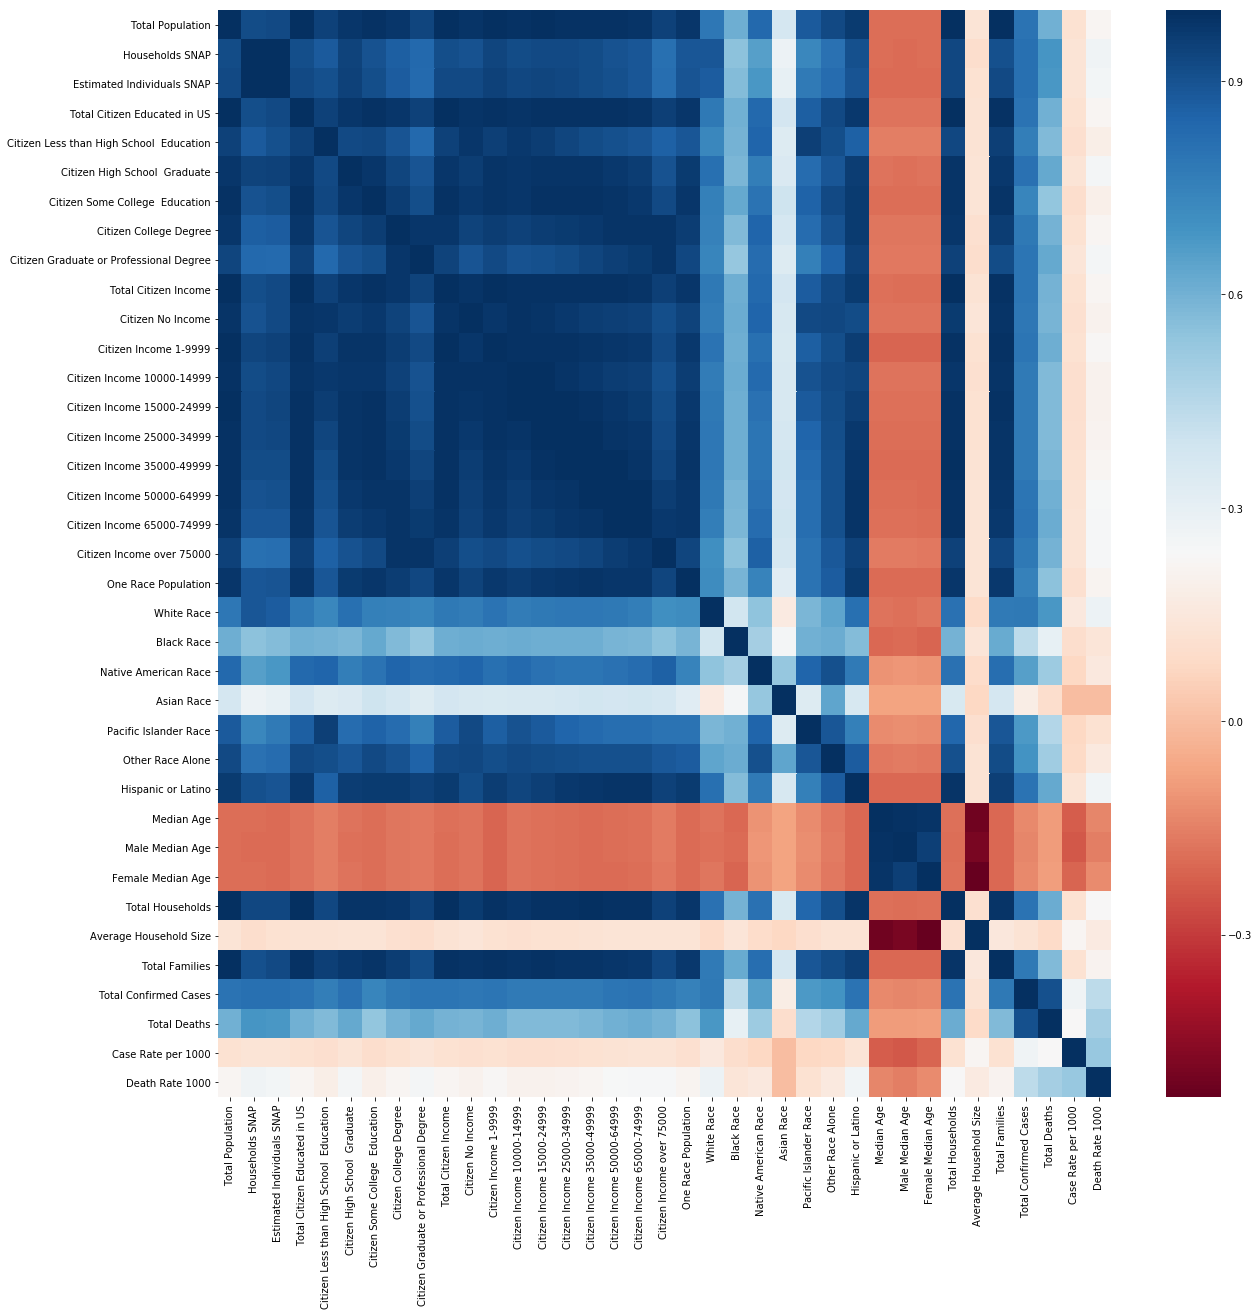

In [11]:
# print out a correlation matrix of the data frame
corr = df.corr()

# display it
display(corr)
f, ax = plt.subplots(figsize=(20, 20)) # adjust the size of the heat map to see all the features 

# plot a heatmap
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap = "RdBu")

<b> Visualize all Covid target variables: 'Total Confirmed Cases' </b>

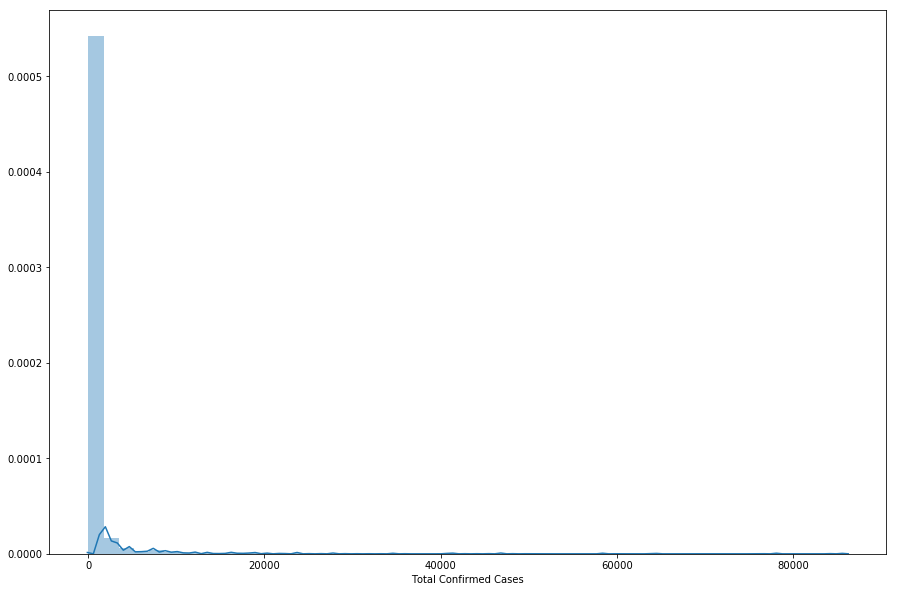

In [12]:
# check the average level of COVID Confirmed Cases
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df['Total Confirmed Cases'])

<b> Visualize all Covid target variables: 'Total Deaths' </b>

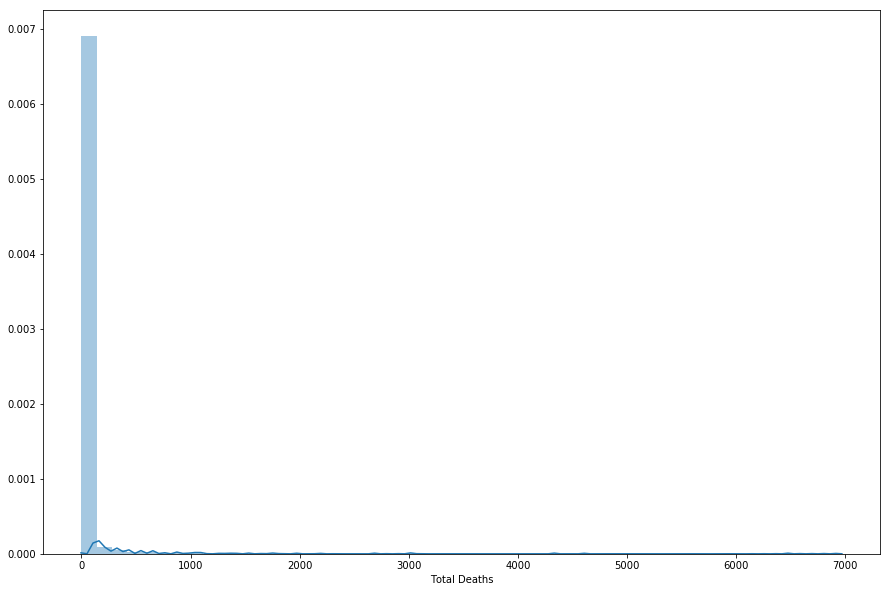

In [13]:
# check the average level of COVID Deaths
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df['Total Deaths'])

<b> Visualize all Covid target variables: 'Case Rate per 1000' </b>

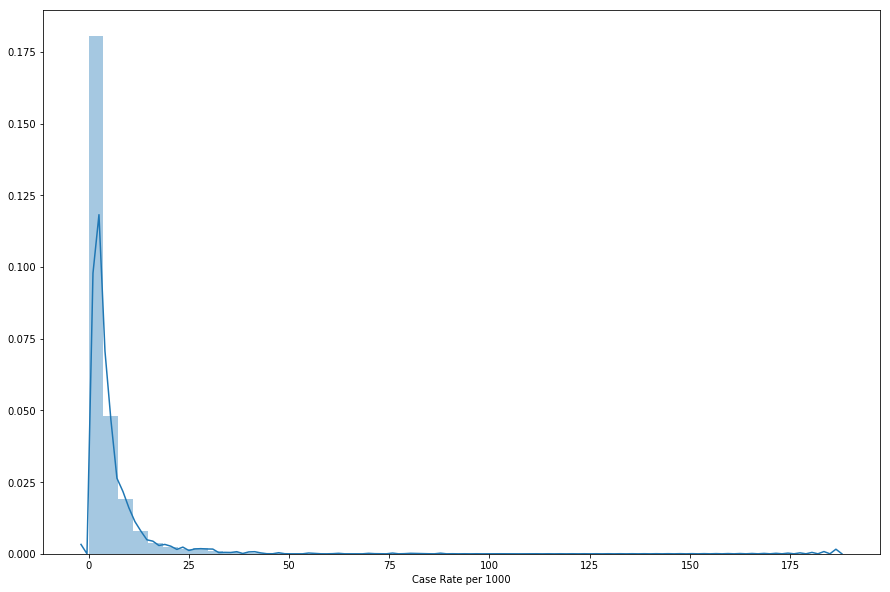

In [14]:
# check the average level of COVID Case Rate per 1000
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df['Case Rate per 1000'])

<b> Visualize all Covid target variables: 'Death Rate per 1000' </b>

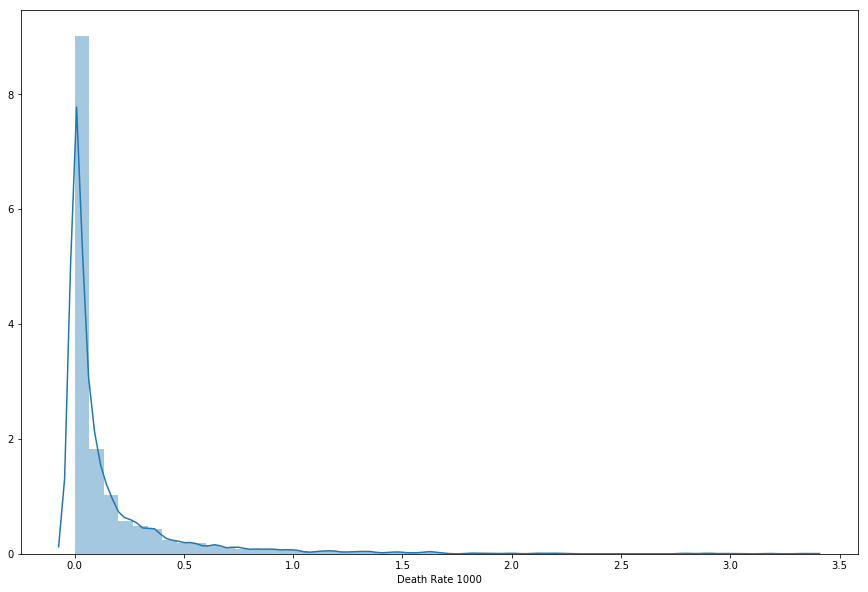

In [15]:
# check the average level of COVID Death Rate per 1000
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df['Death Rate 1000']) # removed 'per' in original csv file

Take-away from Target Variables Distributions:
--------------------
The data is unevenly distributed, with more lower values for total cases, deaths and case and death rates. These distrubutions should not be even because it would be even more concerning if there were more deaths. Additionally, there cannot be more deaths than total population. This confirms the integrity of the data is good. 

## Goal of the Next Section: Exploring Relationships between Variable 
Most Importantly:
- COVID data vs Race
- COVID data vs Education
- COVID data vs Income Bracket
- COVID data vs Household Size

In [16]:
# make sure these relationships makes sense, check for data integrity
# look at relationship between total case - case rate 
# total deaths - death rate

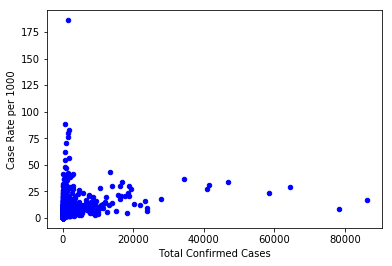

In [35]:
df.plot(kind='scatter', x='Total Confirmed Cases', y='Case Rate per 1000', c=['b'])

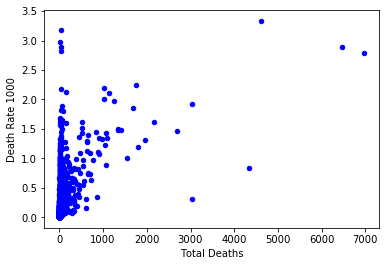

In [36]:
df.plot(kind='scatter', x='Total Deaths', y='Death Rate 1000', c=['b'])

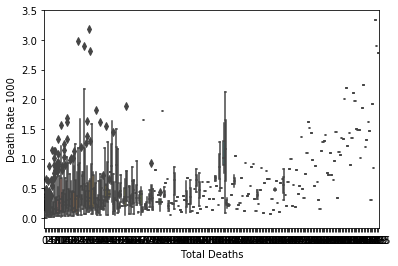

In [38]:
# hard to create a boxplot with so many rows -- too small
ax = sns.boxplot(y="Death Rate 1000",x="Total Deaths", data=df)

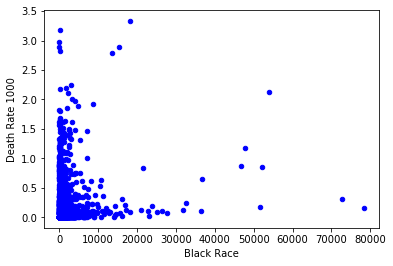

In [37]:
# simple one line code for scatter plot
# same as below code block
df.plot(kind='scatter', x='Black Race', y='Death Rate 1000', c=['b'])

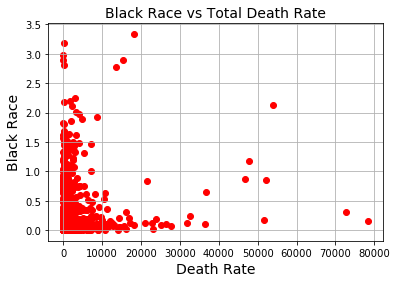

In [31]:
# scatter plot relationship between Death Rate and Black Race
plt.scatter(df['Black Race'],df['Death Rate 1000'], color='red')
plt.title('Black Race vs Total Death Rate', fontsize=14)
plt.xlabel('Death Rate', fontsize=14)
plt.ylabel('Black Race', fontsize=14)
plt.grid(True)
plt.show()

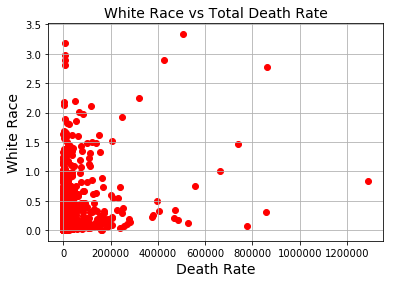

In [32]:
# scatter plot relationship between Death Rate and white Race
plt.scatter(df['White Race'],df['Death Rate 1000'], color='red')
plt.title('White Race vs Total Death Rate', fontsize=14)
plt.xlabel('Death Rate', fontsize=14)
plt.ylabel('White Race', fontsize=14)
plt.grid(True)
plt.show()

## Take Away
Visually hard to tell, but it seems like there is a bigger cluster of 'White Race' near low 'Death Rate per 1000' compared to 'Black Race'.

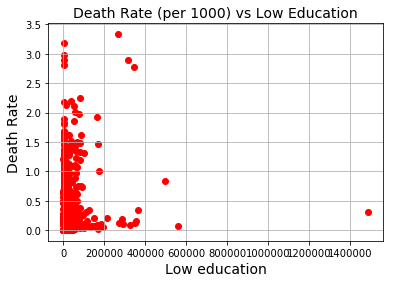

In [25]:
# scatter plot relationship between Death Rate and lowest income bracket
plt.scatter(df['Citizen Less than High School  Education'],df['Death Rate 1000'], color='red')
plt.title('Death Rate (per 1000) vs Low Education', fontsize=14)
plt.xlabel('Low education', fontsize=14)
plt.ylabel('Death Rate', fontsize=14)
plt.grid(True)
plt.show()

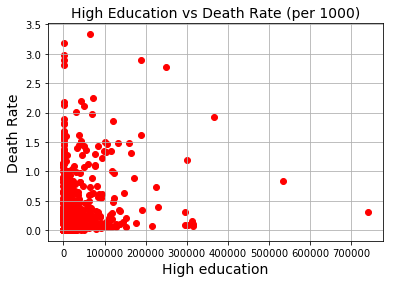

In [29]:
# scatter plot relationship between Death Rate and high Education (master's/professional - highest edu)
plt.scatter(df['Citizen Graduate or Professional Degree'],df['Death Rate 1000'],color='red')
plt.title('High Education vs Death Rate (per 1000)', fontsize=14)
plt.xlabel('High education', fontsize=14)
plt.ylabel('Death Rate', fontsize=14)
plt.grid(True)
plt.show()

## Take Away
- The variability in Death Rate is wider for Higher Education, meaning, high education allows higher chance of survival during the COVID outbreak compared to low education.

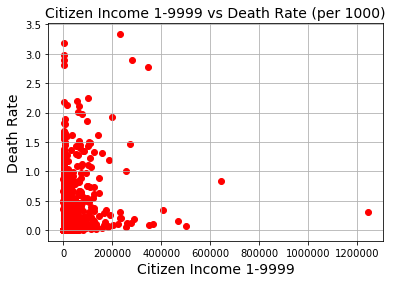

In [33]:
# scatter plot relationship between Death Rate and high Education (master's/professional - highest edu)
plt.scatter(df['Citizen Income 1-9999'],df['Death Rate 1000'],color='red')
plt.title('Citizen Income 1-9999 vs Death Rate (per 1000)', fontsize=14)
plt.xlabel('Citizen Income 1-9999', fontsize=14)
plt.ylabel('Death Rate', fontsize=14)
plt.grid(True)
plt.show()

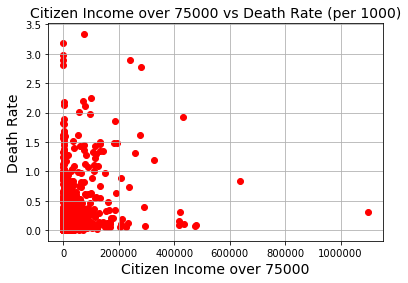

In [34]:
#scatter plot relationship between Death Rate and highest income bracket
plt.scatter(df['Citizen Income over 75000'],df['Death Rate 1000'],color='red')
plt.title('Citizen Income over 75000 vs Death Rate (per 1000)', fontsize=14)
plt.xlabel('Citizen Income over 75000', fontsize=14)
plt.ylabel('Death Rate', fontsize=14)
plt.grid(True)
plt.show()

## Take Away
Visually very hard to tell in these scatter plots -- will conduct further analysis in Data Mining Models.

## Histograms

In [45]:
## show all features
list(df.columns)

# Make a list of the continuous features + Revenue
lst_continuous_features = ['Citizen Less than High School  Education',
        'Citizen High School  Graduate', 'Citizen Some College  Education',
        'Citizen College Degree', 'Citizen Graduate or Professional Degree',
        'Total Citizen Income', 'Citizen No Income', 'Citizen Income 1-9999',
        'Citizen Income 10000-14999', 'Citizen Income 15000-24999',
        'Citizen Income 25000-34999', 'Citizen Income 35000-49999',
        'Citizen Income 50000-64999', 'Citizen Income 65000-74999',
        'Citizen Income over 75000', 'White Race',
        'Black Race']

Text(0.5,0.98,'Distribution of Continuous Features')

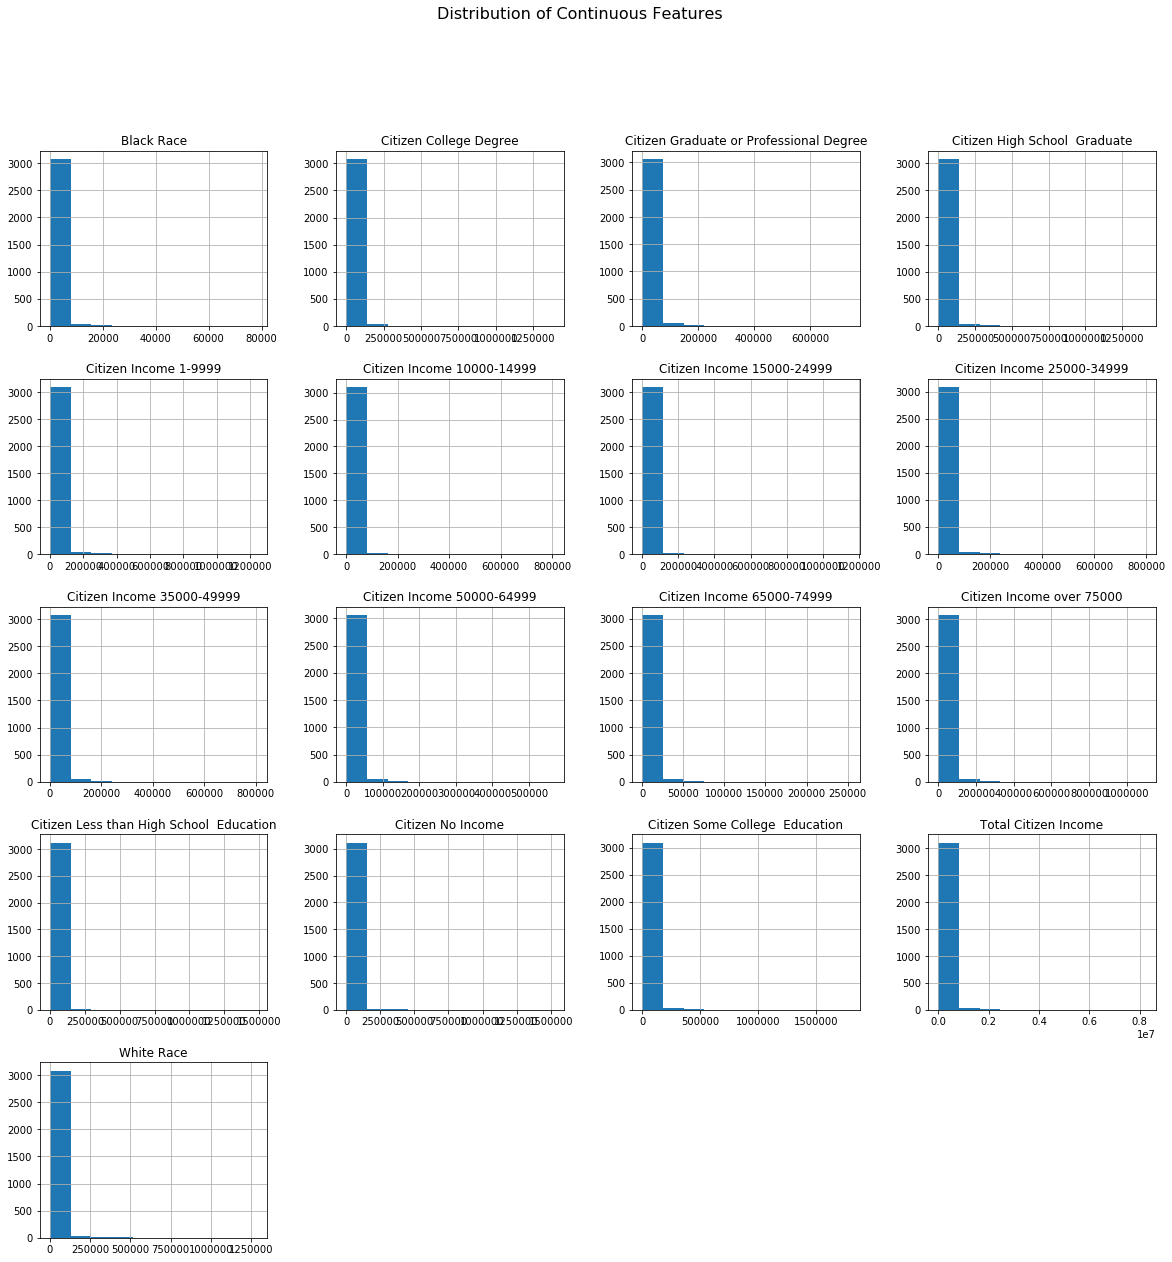

In [46]:
# define all continuous features in new dataframe
pd.DataFrame.hist(df[lst_continuous_features], figsize = [20,20])
plt.suptitle("Distribution of Continuous Features", fontsize=16)

___
<a id = "6"> <h2> 6. Dataset Skewness </h2> </a>

# Skewness 
- If skewness is less than −1 or greater than +1, the distribution is highly skewed.
- If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed.
- If skewness is between −½ and +½, the distribution is approximately symmetric.
- A symmetrical distribution has a skewness of zero.
- An asymmetrical distribution with a long tail to the right (higher values) has a positive skew.
- An asymmetrical distribution with a long tail to the left (lower values) has a negative skew.

In [44]:
# check the skewness of the dataframe
df.skew()

Total Population                            14.366738
Households SNAP                             10.877823
Estimated Individuals SNAP                  11.652447
Total Citizen Educated in US                13.918064
Citizen Less than High School  Education    22.829845
Citizen High School  Graduate               11.818992
Citizen Some College  Education             12.986895
Citizen College Degree                      12.726770
Citizen Graduate or Professional Degree     10.723848
Total Citizen Income                        14.052336
Citizen No Income                           17.663261
Citizen Income 1-9999                       13.937301
Citizen Income 10000-14999                  17.150624
Citizen Income 15000-24999                  15.004945
Citizen Income 25000-34999                  12.909407
Citizen Income 35000-49999                  11.825275
Citizen Income 50000-64999                  11.340243
Citizen Income 65000-74999                  11.371222
Citizen Income over 75000   

# Take Away 
- All features seem to be highly skewed and normalization is necessary in the data preparation phase.

___
<a id = "7"> <h2> 7. Correlation Analysis </h2> </a>

In [49]:
# define correlation matrix (absolute corr values)
data_corr = df[['Citizen Less than High School  Education',
        'Citizen High School  Graduate', 'Citizen Some College  Education',
        'Citizen College Degree', 'Citizen Graduate or Professional Degree',
        'Total Citizen Income', 'Citizen No Income', 'Citizen Income 1-9999',
        'Citizen Income 10000-14999', 'Citizen Income 15000-24999',
        'Citizen Income 25000-34999', 'Citizen Income 35000-49999',
        'Citizen Income 50000-64999', 'Citizen Income 65000-74999',
        'Citizen Income over 75000', 'White Race',
        'Black Race']]

# define a correlation matrix
corr_matrix = data_corr.corr().abs()

# show correlation matrix
#corr_matrix

In [51]:
#source:  https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
# create a function to drop the redundant pairs in the correlation matrix (all correlations are mirrored diagionaly)
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print('----------------------------------------------------')
print('Top Absolute Correlations')
print('----------------------------------------------------')
# show top 'n' correlations
get_top_abs_correlations(data_corr, n=10)

# only show correlations higher or equal to 0.5
get_top_abs_correlations(data_corr, n=10)[get_top_abs_correlations(data_corr, n=10) >= 0.5]

# Our threshold is set to 0.5 for dropping either one of the highly correlated variables

----------------------------------------------------
Top Absolute Correlations
----------------------------------------------------


Citizen Income 25000-34999       Citizen Income 35000-49999    0.996982
Citizen Income 50000-64999       Citizen Income 65000-74999    0.996918
Citizen Income 15000-24999       Citizen Income 25000-34999    0.995865
Citizen Income 10000-14999       Citizen Income 15000-24999    0.994883
Citizen Income 35000-49999       Citizen Income 50000-64999    0.994818
Total Citizen Income             Citizen Income 1-9999         0.994445
                                 Citizen Income 15000-24999    0.993961
Citizen Income 1-9999            Citizen Income 15000-24999    0.993904
Total Citizen Income             Citizen Income 25000-34999    0.993745
Citizen Some College  Education  Citizen Income 25000-34999    0.993151
dtype: float64

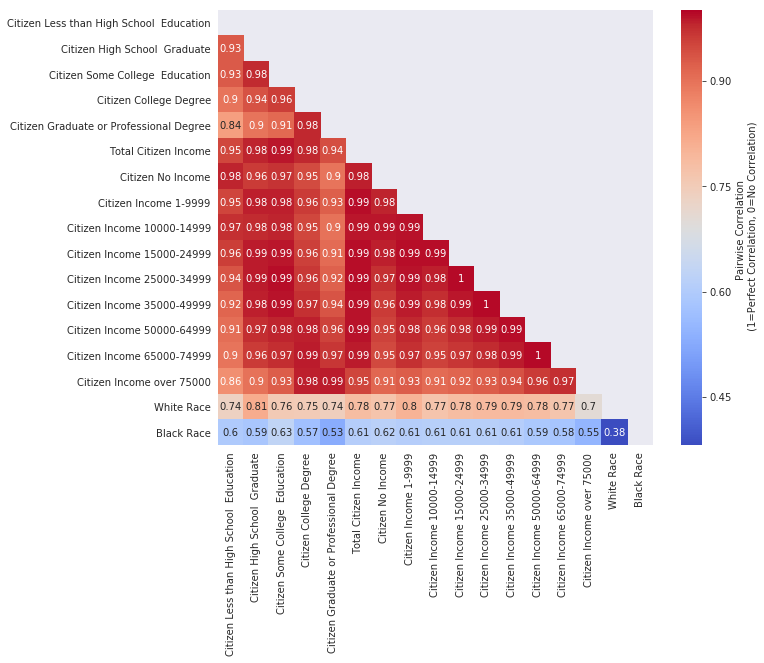

In [52]:
# Create a heatmap from our Pearson's correlation matrix
# source: https://seaborn.pydata.org/generated/seaborn.heatmap.html
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("darkgrid"):
    f, ax = plt.subplots(figsize=(10, 8))
    # plot a seaborn heatmap with labels inside (annot=True), a title for the bar (cbar_kws) and colorstyle (cmap)
    ax = sns.heatmap(corr_matrix, mask=mask, vmax=1, square=True, annot=True, cbar_kws={'label': 'Pairwise Correlation \n (1=Perfect Correlation, 0=No Correlation)'}, cmap="coolwarm")

# Take Away 
- The most clear conclusion is that there is a difference between 'White Race' and 'Black Race' when looking at Education and Income brackets.
- 'White Race' is more correlated with higher income and higher education compared to 'Black Race'